In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})

In [34]:
bufmap = np.memmap("/dev/shm/rbuff", dtype=np.int8, mode='r')
NFFT = 4096*2
Ntimes = int((bufmap.shape[0])/NFFT)

bufspecwf_icomplex = np.zeros([Ntimes, int(NFFT/2)], dtype=np.float64)
for i in range(Ntimes):
    buf1 = bufmap[i*NFFT: (i+1)*NFFT]
    buf_complex = buf1[0::2] + buf1[1::2]*1j
    bufspecwf_icomplex[i, :] = np.fft.fftshift(np.abs(np.fft.fft(buf_complex))**2)

# plt.figure(figsize=(16,9))
# plt.plot(np.fft.fftshift(bufspec))

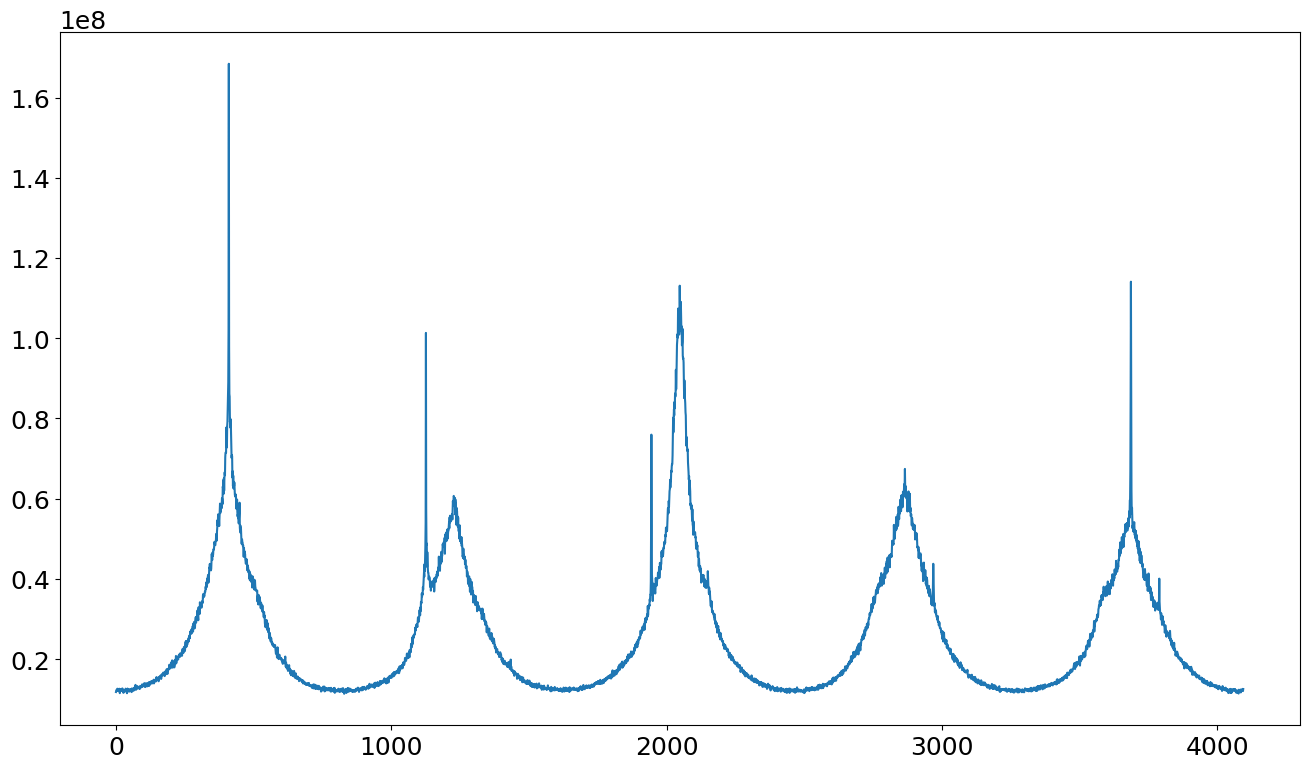

In [35]:
plt.figure(figsize=(16,9))
# plt.plot(np.mean(bufspecwf_icomplex, axis=0))
plt.plot(np.mean(bufspecwf_icomplex, axis=0))

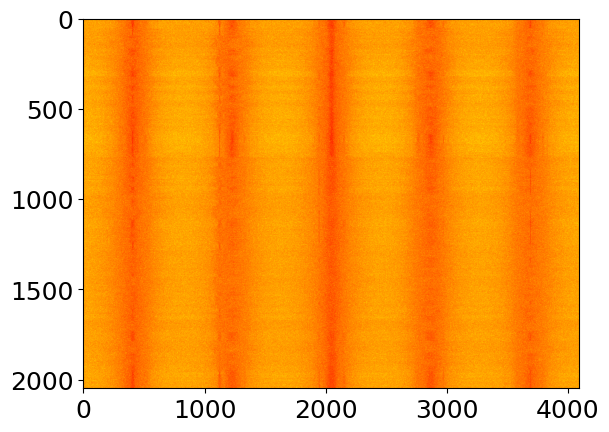

In [36]:
plt.figure()
plt.imshow(np.log(np.abs(bufspecwf_icomplex)), aspect='auto', cmap='jet')